#**Simple Linear Regression - Scratch (Gradient Descent Basic Code)**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix


**Code**

In [2]:
class LinearRegressionGD:
  def __init__(self, regul=0, reg_type=None):
    self.regul = regul  # Regularization strength
    self.reg_type = reg_type  # Regularization type
    self.W = None  # Weights

  def fit(self, X, y, lr=0.01, num_iter=1000):
    # Input validation
    if len(X) != len(y) or len(X) == 0:
        raise ValueError("X and y must have the same length and cannot be empty")

    # Add bias term to X -> [1 X]
    X = np.hstack([np.ones((len(X), 1)), X])

    # Initialize W to zeros
    self.W = np.zeros(X.shape[1])

    # Use gradient descent to minimize cost function
    for i in range(num_iter):
        # Calculate predicted values
        y_pred = np.dot(X, self.W)

        # Calculate cost function based on regularization type
        if self.reg_type == 'l2':
            cost = np.sum((y_pred - y) ** 2) + self.regul * np.sum(self.W ** 2)
        elif self.reg_type == 'l1':
            cost = np.sum((y_pred - y) ** 2) + self.regul * np.sum(np.abs(self.W))

        # Calculate gradients based on regularization type
        if self.reg_type == 'l2':
            gradients = 2 * np.dot(X.T, (y_pred - y)) + 2 * self.regul * self.W
        elif self.reg_type == 'l1':
            gradients = 2 * np.dot(X.T, (y_pred - y)) + self.regul * np.sign(self.W)

        # Update W
        self.W = self.W - lr * gradients

        if i % 10 == 0:
            print(f"Iteration {i}, Cost: {cost}")

  def predict(self, X):
    # Add bias term to X
    X = np.hstack([np.ones((len(X), 1)), X])

    # Calculate predicted values
    y_pred = np.dot(X, self.W)
    return y_pred

**Dataset**

In [3]:
# Training example
X = np.array([[1, 2, 3, 4, 5]]).T
y = np.array([2, 4, 5, 4, 5])

**Train**

In [4]:
# Train for L2 regularization (Ridge)
lr = LinearRegressionGD(regul=0.1, reg_type='l2')
lr.fit(X, y, lr=0.01, num_iter=10)

Iteration 0, Cost: 86.0


In [5]:
print(lr.W)

[0.60405592 1.0400099 ]


In [6]:
# Print the slope and intercept
slope = lr.W[1]
intercept = lr.W[0]
print("Slope (W):", slope)
print("Intercept (b):", intercept)

Slope (W): 1.0400099045398028
Intercept (b): 0.6040559187001451


**Prediction**

In [7]:
# Prediction on X data (Training Data)
y_pred = lr.predict(X)
print(y_pred)

[1.64406582 2.68407573 3.72408563 4.76409554 5.80410544]


In [8]:
# Prediction for single data point
gyan = lr.predict(np.array([50]).reshape(-1, 1))
print(gyan)

[52.60455115]


**Visualization**

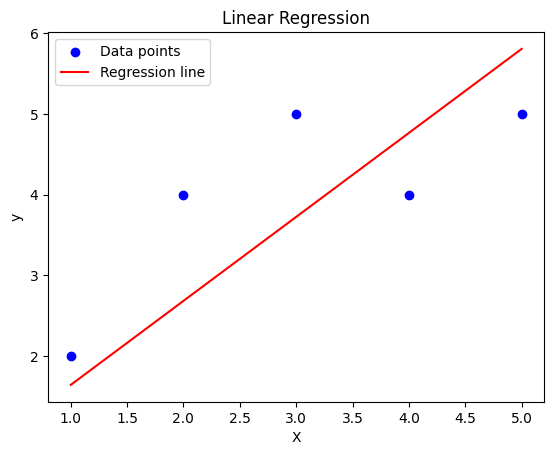

In [9]:
# Plot the data and the linear regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()